# Take-home Programming Test


# Question 1: Employees

To make my question less ambiguous, I downloaded a dataset from kaggle which looks very similar to the table given in the question. Let's try and implement the solution on the dataframe itself.

First, we'll clean the dataframe to make it look like the table in the question. See dataframe employees below.

I changed the Employee ID to the index since it seems like the manager ID refers back to the index and not the original six digit employee ID. This makes it easier to match the Employee IDs and Manager IDs

In [ ]:
import pandas as pd
import numpy as np

employees = pd.read_csv("HRDataset_v14.csv", delimiter=',')
employees = employees[['Employee_Name', 'EmpID', 'Salary', 'ManagerID']]
employees['EmpID'] = employees.index

employees


,Employee_Name,EmpID,Salary,ManagerID
0,"Adinolfi, Wilson K",0,62506,22.0
1,"Ait Sidi, Karthikeyan",1,104437,4.0
2,"Akinkuolie, Sarah",2,64955,20.0
3,"Alagbe,Trina",3,64991,16.0
4,"Anderson, Carol",4,50825,39.0
...,...,...,...,...
306,"Woodson, Jason",306,65893,20.0
307,"Ybarra, Catherine",307,48513,12.0
308,"Zamora, Jennifer",308,220450,2.0
309,"Zhou, Julia",309,89292,4.0


I duplicated the dataframe for managers, and merge the two by ManagerID. This makes it easier to make direct comparisons between Employees and their corresponding Managers.

In [ ]:

managers = employees[['Employee_Name', 'EmpID', 'Salary']]
managers.columns = ['Manager_Name', 'ManagerID', 'Manager_Salary']

employees = pd.merge(employees, managers, on = ['ManagerID'])
employees

,Employee_Name,EmpID,Salary,ManagerID,Manager_Name,Manager_Salary
0,"Adinolfi, Wilson K",0,62506,22.0,"Billis, Helen",62910
1,"Barton, Nader",14,52505,22.0,"Billis, Helen",62910
2,"Blount, Dianna",23,66441,22.0,"Billis, Helen",62910
3,"Chace, Beatrice",41,61656,22.0,"Billis, Helen",62910
4,"Crimmings, Jean",58,56149,22.0,"Billis, Helen",62910
...,...,...,...,...,...,...
298,"Tannen, Biff",275,90100,13.0,"Barone, Francesco A",58709
299,"Wang, Charlie",298,84903,13.0,"Barone, Francesco A",58709
300,"Foster-Baker, Amy",97,99351,9.0,"Bacong, Alejandro",50178
301,"King, Janet",150,250000,9.0,"Bacong, Alejandro",50178


**a. Give the name of employees, whose salaries are greater than their immediate manager’s**

Since I've already merged the dataframe as above, I can make a direct comparison between the Employee Salary and Manager Salary. If the Employee Salary is greater than the Manager salary, I print the Employee Name. I've converted the names to a list

In [ ]:
names=employees[employees['Salary']>employees['Manager_Salary']]['Employee_Name']

print(list(names))

['Blount, Dianna', 'Lundy, Susan', 'Moumanil, Maliki ', 'Sloan, Constance', 'Sullivan, Timothy', 'Ait Sidi, Karthikeyan   ', 'Barbossa, Hector', 'Becker, Renee', 'Booth, Frank', 'Carr, Claudia  N', 'Costello, Frank', 'Goble, Taisha', 'Horton, Jayne', 'Johnson, Noelle ', 'Pearson, Randall', 'Petrowsky, Thelma', 'Roby, Lori ', 'Roehrich, Bianca', 'Salter, Jason', 'Simard, Kramer', 'Voldemort, Lord', 'Zhou, Julia', 'Akinkuolie, Sarah', 'Bugali, Josephine ', 'Cole, Spencer', 'Davis, Daniel', 'Eaton, Marianne', 'Gosciminski, Phylicia  ', 'Latif, Mohammed', 'Leach, Dallas', 'Mckenna, Sandy', 'Monterro, Luisa', 'Myers, Michael', "O'hare, Lynn", 'Robertson, Peter', 'Rossetti, Bruno', 'Veera, Abdellah ', 'Woodson, Jason', 'Faller, Megan ', 'Lunquist, Lisa', 'Tejeda, Lenora ', 'Anderson, Linda  ', 'Bernstein, Sean', 'Burke, Joelle', 'Chivukula, Enola', 'Desimone, Carl ', 'Fernandes, Nilson  ', 'Fitzpatrick, Michael  J', 'Girifalco, Evelyn', 'Harrison, Kara', 'Huynh, Ming', 'MacLennan, Samuel', '

**b. What is the average salary of employees who do not manage anyone? In the sample above, that would be John, Mike, Joe and Dan, since they do not have anyone reporting to them**

My solution for this is slightly convoluted. Here is what I did in steps:

* Define a function uniq: which removes duplicate values from a list. We use this to remove duplicates after creating a list of managerIDs directly from the dataframe.
* We create a list ranging from 0 to 302, or a list of all the employee IDs, check if manager ID is in this list and then remove manager IDs. This gives a list of employee IDs for employees who are not managers.
* The notmanager list makes it easy to access Salaries for employees who are not managers, append it to a list and compute the average salary.

In [ ]:
def uniq(input):
  output = []
  for x in input:
    if x not in output:
      output.append(x)
  return output


managerlist = employees['ManagerID'].tolist()
managerlist = uniq(managerlist)

#notmanager = list((range(0,302)))
notmanager = employees['EmpID'].tolist()
for id in managerlist:
  if id in notmanager:
    notmanager.remove(id)

notmanagersal = []
for index, row in employees.iterrows():
  if row['EmpID'] in notmanager:
    notmanagersal.append(row['Salary'])

avgSalary = np.mean(notmanagersal)

print('The average Salary of employees who are not managers is: ', avgSalary)



The average Salary of employees who are not managers is:  69383.95390070922


# Question 2

**Write a function ‘exists’ which takes a variable symbol v and returns whether v is defined**

what these symbols could be:
* integer
* float
* text
* boolean
* tuple
* list
* dict

the function below does a simple check for the type of the variable. If the type is from the list above, it returns the string defined. If not, it returns undefined.

In [ ]:
def exists(v):
    if type(v) in [int, float, str, bool, tuple, list, dict]:
        return 'defined'
    else:
        return 'undefined'

exists(5.6)

'defined'

But this is an 'exhaustive' method. This will not work with other data structures nor self created data structures, for example: something like a linked list or a dataframe

# Question 3: Pascal's Triangle

The best way to understand Pascal's triangle is by Binomial Theorem: i.e. the coefficients of $(a+b)^n$ gives the $n^{th}$ row of the triangle.

From binomial theorem, $$(a+b)^n = \sum_{r=1}^{n} {n\choose r} a^r b^{n-r}$$

Thus the coefficients are $n\choose r$ for $r = 1,2, \dots n.$

Let's create a function nCr which gives $n\choose r = \frac{n!}{r! (n-r)!}$. Since negative factorial is not defined, $n - r \geq 0$ or $n \geq r$. Thus, we raise a value error if $n \leq r$.

next we define pascal which takes in an integer n, or the number of rows of the pascal's triangle we would like to print. we iterate through $1$ to $(n+1)$ because for the $n$ layers, we have $(n+1)$ rows. Similarly, for the $k^{th}$ row, we have $k+1$ elements.

For each row k, we print ${k\choose r}$ with $r = 0,1,2, \dots k$. This gives us the $k^{th}$ row of the Pascal's Triangle.

print a blank after each row iteration to move to the next line after each $'k'$

Attempt 1

In [ ]:
from math import factorial

def nCr(n,r):
    if n < r:
        return ('Value Error. n cannot be lesser than r')
    else:
        return int(factorial(n) / (factorial(r)*factorial(n-r)))


def pascal(n):
    for k in range(n+1):
        for r in range(k+1):
        #print(k)
            print(nCr(k,r), end = " ")
        print()

pascal(5)

1 
1 1 
1 2 1 
1 3 3 1 
1 4 6 4 1 
1 5 10 10 5 1 


# Question 4: Portfolio Optimisation, VaR

**Assume have the following portfolio as of 2016/01/01:** 



**AAPL.O 15%**

**IBM.N 20%**

**GOOG.O 20%** 

**BP.N 15%** 

**XOM.N 10%**

**COST.O 15%** 

**GS.N 5%**


**a. Using historical daily returns (Yahoo/Google Finance or any other market data source), calculate VaR95% and CVaR95% of the portfolio as of 2016/12/31**

In [ ]:
import pandas as pd
import pandas_datareader as dr

turns out yahoo finance doesn't read extensions and i'm not sure how to bypass this so I'm going to input the main ticker first: i.e. instead of AAPL.O, i'll use AAPL for now. I've created a dataframe $dfPrice$ which stores the Adjusted Closing price of the tickers over the year 2016. I've dropped all NA values to reduce errors.

In [ ]:
tickers = ['AAPL', 'IBM', 'GOOG', 'BP', 'XOM', 'COST', 'GS']
l = len(tickers)
priceData = []

for ticker in range(l):
    prices = dr.DataReader(tickers[ticker], start = '2016-01-01', end = '2016-12-31', data_source = 'yahoo')
    priceData.append(prices.assign(ticker=ticker)[['Adj Close']])
dfPrice = pd.concat(priceData, axis = 1)
dfPrice.columns = tickers
dfPrice.dropna()
dfPrice.head()

,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2015-12-31,24.266081,106.805664,758.880005,21.524876,58.759171,142.766663,164.204666
2016-01-04,24.286833,105.509605,741.840027,21.387156,58.389812,141.034027,161.389420
2016-01-05,23.678219,105.432014,742.580017,21.297642,58.887341,141.378769,158.610535
2016-01-06,23.214844,104.904251,743.619995,20.863838,58.397354,140.070480,154.738495
2016-01-07,22.235069,103.111481,726.390015,20.264778,57.462631,136.861542,149.982651


I create another dataframe $dfReturn$ which stores the daily historical returns. 

In [ ]:
dfReturn = dfPrice.pct_change()
dfReturn.dropna()
dfReturn.head()

,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,0.000855,-0.012135,-0.022454,-0.006398,-0.006286,-0.012136,-0.017145
2016-01-05,-0.025059,-0.000735,0.000998,-0.004185,0.008521,0.002444,-0.017219
2016-01-06,-0.019570,-0.005006,0.001400,-0.020369,-0.008321,-0.009254,-0.024412
2016-01-07,-0.042205,-0.017090,-0.023170,-0.028713,-0.016006,-0.022909,-0.030735


In [ ]:
import matplotlib.pyplot as plt

we know that portfolioReturn is just the weighted average of individual returns:

$$R_p = \Sigma_{i=1}^N w_i R_i$$

Here I take a dot product of weights and the dataframe $dfReturn$ to get the portfolio return $R_p$ or $portfolioReturn$

Text(0.5,0,'time')

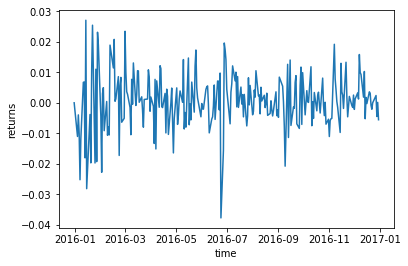

In [ ]:
weights = [0.15, 0.2, 0.2, 0.15, 0.1, 0.15, 0.05]

portfolioReturn = (weights * dfReturn).sum(axis = 1)
plt.plot(portfolioReturn)
plt.ylabel('returns')
plt.xlabel('time')


Value at Risk is the maximum expected loss at a given time period with a given confidence.
So 95% VaR is the worst possible loss after excluding 5% of the worst possible losses.

Conditional Value at Risk takes into account the 5% worst possible losses and conditions the expected return on them, i.e. we calculate VaR with more 'information'.

Here, we can just use an inbuilt function in the package empyrical to give us both VaR and CVaR, where we input portfolioReturn as returns and $$cutoff = 1 - conf. level$$ which is the 95% case is just 5% or 0.05

In [12]:
import empyrical
from empyrical import stats

print('The 95% VaR for the given portfolio is: ', round(empyrical.stats.value_at_risk(portfolioReturn, 0.05),3))


The 95% VaR for the given portfolio is:  -0.014


In [13]:
print('The 95% CVaR for the given portfolio is: ',round(empyrical.stats.conditional_value_at_risk(portfolioReturn, 0.05),3))

The 95% CVaR for the given portfolio is:  -0.021


**Parametric Approach**

Assume that the returns are normally (gaussian) distributed, estimate the mean and volatility of distribution.

For $\alpha$ quantile, $z_{\alpha}$, we have 
$$P \left( \frac{R_p - \mu_p}{\sigma_p} \leq z_{\alpha} \right) = \alpha$$

or

$$P\left( R_p \leq \mu_p + z_{\alpha}\sigma_p \right) = \alpha$$

Thus, $$VaR_{\alpha} = \mu_p + z_{\alpha}\sigma_p$$

In [68]:
import numpy as np
from scipy.stats import norm

alpha = 0.05
mu = portfolioReturn.mean()
sigma = portfolioReturn.std()

z_alpha = norm.ppf(alpha)

var = mu + z_alpha*sigma 
print(round(var, 3))

-0.014


and for conditional VaR, 

we have $CVaR = E \left[ R | R \leq VaR \right]$

which gives:

$$CVaR = \frac{\int_{-\infty}^{VaR} x f_R(x) dx}{F_R(VaR)}$$

where $f_R(x)$ is the probability density of portfolio returns $R$ and $F_R(x)$ is the Cumulative probability density of portfolio 
returns $R$.

In other words, this is just the average of all returns that are lower than VaR

In [82]:
#cvar = portfolioReturn[portfolioReturn <= var].mean() (historic)

import math
from scipy.integrate import quad

def normal_exp(x):
    value = x*norm.pdf(x,mu,sigma)
    return value


cvar2 = quad(lambda x: (x/(sigma*math.sqrt(2*math.pi))*math.e**(0.5*(x-mu)/sigma)), -10**10, var)[0] / alpha
print(cvar2)
cvar = quad(normal_exp, -10**10, var)[0]/alpha
cvar

-0.0


-0.0

**Assume you can change weights, allow shorting but no leverage (i.e. sum of weights equal 100%), and rebalance monthly. What is the optimal portfolio holding by end of each month till end of 2016.**

Here, we take a 3 month lookback period and calculate optimal weights for each lookback period using pyPortfolioOpt's efficient frontier

I created a new $dfPrice$ with prices starting from 1st October 2015 until 31st December 2016

In [16]:
priceData = []

for ticker in range(l):
    prices = dr.DataReader(tickers[ticker], start = '2015-10-01', end = '2016-12-31', data_source = 'yahoo')
    priceData.append(prices.assign(ticker=ticker)[['Adj Close']])
dfPrice = pd.concat(priceData, axis = 1)
dfPrice.columns = tickers
dfPrice.dropna()
dfPrice

,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2015-09-30,25.319597,111.464394,608.419983,20.703743,55.561127,127.471008,157.769699
2015-10-01,25.154316,110.403358,611.289978,20.974733,55.344414,127.462204,159.821747
2015-10-02,25.337959,111.164551,626.909973,22.031597,56.704479,128.608429,160.720612
2015-10-05,25.429783,114.593704,641.469971,22.688751,57.399467,130.557068,164.071045
2015-10-06,25.551449,114.393806,645.440002,23.244289,58.206535,130.856827,163.726028
...,...,...,...,...,...,...,...
2016-12-23,27.459557,134.312378,789.909973,27.488420,70.792923,144.924774,222.956390
2016-12-27,27.633949,134.658798,791.549988,27.555244,70.824150,144.897934,223.502258
2016-12-28,27.516117,133.893402,785.049988,27.659191,70.472946,143.967987,222.660309


To get my rolling lookback period, I use $relativedelta$ from $dateutil$. This makes it intuitive to handle dates, otherwise I'll have to handle different days for different months and all those sorts of problems which gets complicated.
I set start to the 1st Oct 2015, or the second index for $dfPrice$, and a 'last' start date as the 1st of 2 months prior to the month of the last date ( if my last date in the dataframe is 31 Dec 2016, I want my last start date to be 1st October, 2016). 

Now its intuitive for me to make a while loop over start dates with a gap of 1 month, until I hit the last start date.
the end date is set to start date + 3 months using $relativedelta$ once again.

Then I use the pyPortfolioOpt package to generate an efficient frontier from historical returns and volatility, with weight bounds between (-1,1) to account for allowing short selling and not allowing leverage. I find optimal weights for each ticker that maximise the sharpe ratio (or maximise return and minimise risk).

The output for $ef.clean_weights()$ is an ordered dict. However, It would be nicer if the output for us would be a dataframe with new weights for each ticker at the start of every month every month.

Since there is an inbuilt function to convert a dictionary to dataframe, I first convert my ordered dictionary into a dictionary with keys as end dates and values as the list of weights. Note that these are in the same order as the list $tickers$ we defined initially. 

Once i've iterated over all 3 month lookback periods, My $dictWeight$ has a list of weights associated with each end date key.

Now I can just convert this to a dataframe to make it visually easy to see which ticker has what optimal weight at the start dates.

In [17]:
from dateutil.relativedelta import relativedelta
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

start = dfPrice.index[1]
dateNeeded = str(dfPrice.index[-1].year)+'-'+str(dfPrice.index[-1].month-2)+'-01'
startEnd = pd.to_datetime(dateNeeded)

dictWeight = {}

while start != startEnd:
    end = start+relativedelta(months=3)
    pricesLookBack = dfPrice[start:end]
    
    mu = expected_returns.mean_historical_return(pricesLookBack)
    sigma = risk_models.sample_cov(pricesLookBack)
    ef = EfficientFrontier(mu, sigma, weight_bounds=(-1,1))
    weights = ef.max_sharpe()
    cleanWeights = ef.clean_weights()

    dictWeight[end] = list(cleanWeights.values())

    start = start+relativedelta(months=1)

print("Optimal Weights by Month")
pd.DataFrame.from_dict(dictWeight, orient= 'index', columns = tickers)



Optimal Weights by Month


,AAPL,IBM,GOOG,BP,XOM,COST,GS
2016-01-01,-0.49729,-0.64849,1.00000,0.16213,0.41461,0.91110,-0.34207
2016-02-01,-0.78130,0.04778,1.00000,0.05771,0.42619,1.00000,-0.75039
2016-03-01,-0.87663,1.00000,0.81273,-0.39556,1.00000,0.45946,-1.00000
2016-04-01,0.35389,1.00000,0.28787,-0.41112,0.60326,-0.19286,-0.64105
2016-05-01,-0.24285,0.33612,0.06259,-0.24565,1.00000,0.06842,0.02137
2016-06-01,-0.07387,0.49547,-0.16240,-0.22200,0.92188,0.06578,-0.02485
2016-07-01,-0.16697,-0.03947,0.12911,0.66803,1.00000,0.09178,-0.68248
2016-08-01,0.35078,1.00000,0.24036,-0.04651,-0.19460,0.37543,-0.72546
2016-09-01,0.76264,0.31519,0.15581,0.81235,-1.00000,0.32931,-0.37530
2016-10-01,0.72538,-0.04491,1.00000,0.15327,-0.64138,-0.58480,0.39245


# Question 4: Git Stats

**Assume you have a Python project, which source code is under a git repo folder “my-python-project”. Write a program/script to produce the following statistics of this folder**

The first thing I did was to make a repo called 'my-python-project'. Then, I used the git package to clone the repo via its url and assign the name 'my-python-project' to it.

In [19]:
from git import Repo
Repo.clone_from("https://github.com/infinityandacrylic/my-python-project", 'my-python-project')

<git.repo.base.Repo '/Users/sonakshirohra/Desktop/QAM/treehouse-finance-test/my-python-project/.git'>

**a. How many python files**

I iterate over directory paths, directory names and filenames. Firstly I want to seperate git files since those inbuilt git files. The easiest way to check if a file is a python file or not is if it has the extension '.py', and so I check for filenames which contain the string '.py' and if they do, I append them into a list f along with its full location: dirpath/filename. 

This will make the next question easier when I want to find number of lines of code and things like that.

The number of python files is just the number of items in the list f. 

In [ ]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk('my-python-project'):
    if ".git" not in dirpath:
        for item in filenames:
            if '.py' in item:
                f.append(dirpath+"/"+item)

nopyfile = len(f)

print("Number of python files in my-python-project: ", nopyfile)

Number of python files in my-python-project:  3


**b. How many lines of code in total, how many lines of comment line (empty line doesn’t count)**

since I have my file location for all python files in the list f, I can iterate over f and open each item, use the $.readlines()$ function to create a list, $lines$ which contains all lines of code as elements. I then use $.strip()$ to get rid of the $\n$ and whitespace in the lines. However, now my empty lines will leave behind a ' ' in the list, and so i iterate over lines again and select all elements except ' '.

The length of this list will give me the total number of lines of code in each item, summing over which will give me total lines of code in the repo.

Similarly, I look for those elements with a hash '#' in them, sum over the length of these lists to give the total comments in the repo.

Similar logic with functions where I look for elements with the string $def$.

In [ ]:
total = []
cc = []
fc = []

for item in f:

    with open(item) as l:
        lines = l.readlines()
    lines = [line.strip() for line in lines]
    lines = [line for line in lines if line != '']
    total.append(len(lines))

    comments = [comment for comment in lines if '#' in comment]
    cc.append(len(comments))

    functions = [func for func in lines if 'def' in func]
    fc.append(len(functions))

noOfLines = sum(total)
print('Lines of code in total: ', noOfLines)

noOfComments = sum(cc)
print('Comment Lines in total: ', noOfComments)


Lines of code in total:  23
Comment Lines in total:  7


**c. How many functions is defined in total**

In [ ]:
noOfFunctions = sum(fc)
print('Total number of functions: ', noOfFunctions)

Total number of functions:  4


**d. How many lines of changes from the current version against HEAD~3**

**e. Total folder size (in MB) per each of the subfolder (down to 2 level depth)**